In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract data from local files

Uso pandas para la lectura de datos puesto que son archivos separados por comas y al utilizar el dataset como dataframe me permite realizar algunas operaciones de preprocesamiento con facilidad. Al no tener titulos (cabeceras) los he insertado de forma manual. En la documentación se indica que los valores desconocidos son representados con el simbolo '?', se reemplzaron por valores "nan". 

I use pandas for reading data since they are comma separated files and using the dataset as dataframe allows me to perform some preprocessing operations easily. As they do not have titles (headers) I have inserted them manually. In the documentation it is indicated that the unknown values are represented with the symbol '?', they were replaced by "nan" values.

In [2]:
names=["Age","WorkClass",
        "fnlwgt","education",
        "edu_num","marital_status",
        "occupation","relationship",
        "race","sex","capital_gain",
        "capital_loss","hpweek","native_country","Income"]

data=pd.read_csv("data/adult.data",
                delimiter=',',
                header=None,
                skipinitialspace = True,
                na_values=['?'])
data.columns=names
data.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_test=pd.read_csv("data/adult.test",
                        delimiter=',',
                        header=None,
                        skiprows=1,
                        skipinitialspace = True,
                        na_values=['?'])
data_test.columns=names
data_test.head()

,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


# Explore dataset
Necesito verificar algunos aspectos como lo son:
* Valores perdidos o no disponibles
* Proporcion de datos utilizados (clases y variables categoricas)

I need to verify some aspects such as:
* Missing or unavailable values
* Proportion of data used (classes and categorical variables)

In [4]:
data.isnull().sum()

Age                  0
WorkClass         1836
fnlwgt               0
education            0
edu_num              0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hpweek               0
native_country     583
Income               0
dtype: int64

Los valores no disponibles se pueden eliminar o bien rellenar, sin embargo ambas opciones podrian provocar obtener modelos sesgados

Unavailable values can be removed or filled in, but both options may result in biased models.

Se propone rellenar los valores faltantes de cada categoria con valores como "desconocido", "unavailable", "inaccesible"

It is proposed to fill in the missing values of each category with values such as "unknown", "unavailable", "inaccessible".


In [5]:
# data=data.dropna().reset_index(drop=True)
data["WorkClass"].fillna("unknown",inplace=True)
data["occupation"].fillna("unavailable",inplace=True)
data["native_country"].fillna("inaccessible",inplace=True)
print(data.isnull().sum())


Age               0
WorkClass         0
fnlwgt            0
education         0
edu_num           0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hpweek            0
native_country    0
Income            0
dtype: int64


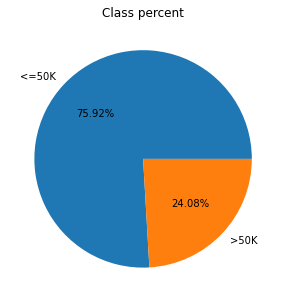

In [6]:
target_ratio=data["Income"].value_counts().to_dict()
plt.figure(figsize=(5,5))
plt.title("Class percent")
plt.pie(x=target_ratio.values(),labels=target_ratio.keys(),autopct='%1.2f%%')
plt.show()

Esta diferencia de clases se debe considerar en el analisis del modelo.

This class difference must be considered in the analysis of the model.

# Preparing data for model

In [7]:
target=data.pop("Income").to_frame()
target.replace(["<=50K",">50K"],[0,1],inplace=True)

In [8]:
target.isnull()

,Income
0,False
1,False
2,False
3,False
4,False
...,...
32556,False
32557,False
32558,False
32559,False


## Numerical Data

In [9]:
num_data=data.select_dtypes(include='number')
num_data.head()

,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [10]:
num_data.describe()

,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical Data

In [11]:
cat_data=data.select_dtypes(exclude='number')
cat_data.head()

,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [12]:
cat_data.describe(include='object')

,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


Como se puede apreciar en la tabla de arriba, cada variable categorica contiene muchas valores individuales. Considerarlas todas en un modelo podría no ser lo mas conveniente puesto que la distribución de cada valor en cada variable categorica no esta balanceada. Ademas de que se obtendrian dimensiones de entrada muy grandes que no son necesarias. Se propone reducir algunas de estas variables de forma manual.

As can be seen in the table above, each categorical variable contains many individual values. Considering them all in one model may not be the most convenient since the distribution of each value in each categorical variable is not balanced. In addition, this would result in very large input dimensions that probably are not necessary. It is proposed to reduce some of these variables manually.

In [13]:
cat_data["WorkClass"].value_counts()


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: WorkClass, dtype: int64

Each row with gov work was replaced using only gov label

In [14]:
cat_data["WorkClass"].replace(["Local-gov","State-gov","Federal-gov"],"gov",inplace=True)

cat_data["WorkClass"].value_counts()

/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Private             22696
gov                  4351
Self-emp-not-inc     2541
unknown              1836
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: WorkClass, dtype: int64

In [15]:
cat_data["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Education levels was grouping on 3 levels: Elementary, HighSchool and Higher

In [16]:
cat_data["education"].replace(["Preschool",
                                "1st-4th",
                                "5th-6th",
                                "7th-8th"],"Elementary",inplace=True)

cat_data["education"].replace(["9th",
                                "10th",
                                "11th",
                                "12th"],"HighSchool",inplace=True)      
                          
cat_data["education"].replace(["HS-grad",
                                "Prof-school",
                                "Masters",
                                "Bachelors",
                                "Some-college",
                                "Prof-school",
                                "Doctorate"],"Higher",inplace=True) 

cat_data["education"].replace(["Assoc-voc",
                                "Assoc-acdm"],"Assoc",inplace=True)  

cat_data["education"].value_counts()

Higher        25859
HighSchool     3055
Assoc          2449
Elementary     1198
Name: education, dtype: int64

From numerical data we can see that "edu_num" has a particulary values, so:

In [17]:
num_data["edu_num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: edu_num, dtype: int64

"edu_num" is a sparse representation of "education", I will remove the numeric variable to keep the group I initially proposed.

In [18]:
cat_data["marital_status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

I will group two categories

In [19]:
cat_data["marital_status"].replace(["Divorced",
                                "Separated"],"Separated",inplace=True)

cat_data["marital_status"].replace(["Married-spouse-absent","Married-AF-spouse"],"MarriedS",inplace=True)

cat_data["marital_status"].value_counts()

Married-civ-spouse    14976
Never-married         10683
Separated              5468
Widowed                 993
MarriedS                441
Name: marital_status, dtype: int64

In [20]:
cat_data["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
unavailable          1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [21]:
cat_data["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [22]:
cat_data["relationship"].replace(["Unmarried",
                                "Not-in-family"],"Alone",inplace=True)

In [23]:
cat_data["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [24]:
cat_data["race"].replace(["Asian-Pac-Islander",
                            "Amer-Indian-Eskimo",
                            "Other"],"Other",inplace=True)

In [25]:
cat_data["native_country"].value_counts()

United-States                 29170
Mexico                          643
inaccessible                    583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [26]:
cat_data["native_country"].where(cat_data["native_country"]=="United-States",other="Other",inplace=True)

/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


In [27]:
cat_data.describe()

,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,7,4,5,15,5,3,2,2
top,Private,Higher,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,25859,14976,4140,13193,27816,21790,29170


La cantidad de valores en las variables categoricas se ha reducido, a partir de aqui, se realiza una codificación para usar en el modelo.

The number of values in the categorical variables has been reduced, from here, a coding is made for use in the model.

In [28]:
num_data.drop('fnlwgt',axis=1,inplace=True)
num_data.drop('edu_num',axis=1,inplace=True)

/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
num_data.describe()

,Age,capital_gain,capital_loss,hpweek
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [34]:
num_target=pd.concat([num_data,target],axis=1)
num_target.describe()

,Age,capital_gain,capital_loss,hpweek,Income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456,0.240810
std,13.640433,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


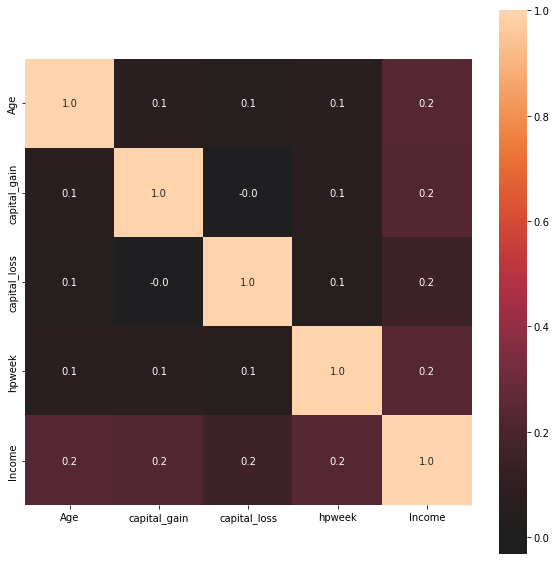

In [35]:

plt.figure(figsize=(10, 10))
sns.heatmap(num_target.corr(), square=True, annot=True, fmt='.1f', center=0)
plt.show()

A partir de la matriz anterior, puedo permitir conservar las caracteristicas originales

From the above matrix, I can allow to keep the original features

In [37]:
OHE=pd.get_dummies(cat_data)
OHE

,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_Without-pay,WorkClass_gov,WorkClass_unknown,education_Assoc,education_Elementary,education_HighSchool,...,relationship_Other-relative,relationship_Own-child,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
32557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32559,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1


In [38]:
X_data=pd.concat([num_data,OHE],axis=1)
X_data

,Age,capital_gain,capital_loss,hpweek,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_Without-pay,WorkClass_gov,...,relationship_Other-relative,relationship_Own-child,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,50,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,0,0,40,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,0,0,40,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
32557,40,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32558,58,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32559,22,0,0,20,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1


In [39]:
Y_data=target
Y_data

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=20,max_depth=5,random_state=1)

RFC.fit(X_data,np.ravel(Y_data))

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=1)

In [45]:
RFC.score(X_data,Y_data)

0.8336660421977212